In [53]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests 
%matplotlib inline

In [ ]:
compurl = '***'
response = requests.get(compurl)
data = response.json()
compdf = pd.DataFrame(data)

In [55]:
compdf = compdf[compdf['startYear'] >= 2018]
compdf = compdf[compdf['gender'] == 'MALE']

In [56]:
compids = compdf['competitionId'].unique()

In [57]:
compseasons = compdf['season'].unique()

In [58]:
seasondict = dict(zip(compids, compseasons))


In [ ]:
# naismith_winners = {
#   2019: "Zion Williamson", 2020: "Obi Toppin", 2021: "Luka Garza",
#     2022: "Oscar Tshiebwe", 2023: "Zach Edey", 2024: "Zach Edey"
# }
# playersurl2 = f'***'
# response = requests.get(playersurl2)
# data = response.json()
# playersdf2 = pd.DataFrame(data)
# # playersdf2['year'] = playersdf2['competitionId'].map(seasondict)
# # playersdf2['naismith'] = 0
# # for year, player in naismith_winners.items():
# #     playersdf2.loc[(playersdf2['fullName'] == player) & (playersdf2['year'] == year), 'naismith'] = 1

# playersdf2.to_csv('data2.csv',index=False,header=True)



In [ ]:
# allplayerdata = pd.DataFrame()
# for id in compids:
#     playersurl = f'***'
#     response = requests.get(playersurl)
#     data = response.json()
#     playersdf = pd.DataFrame(data)
#     allplayerdata = pd.concat([allplayerdata, playersdf], ignore_index=True)
#     print(f'Finished {id}')

Finished 22850


/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_16670/2938441843.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  allplayerdata = pd.concat([allplayerdata, playersdf], ignore_index=True)


Finished 24996
Finished 27693
Finished 30629
Finished 33533
Finished 36046
Finished 38409


/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_16670/2938441843.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  allplayerdata = pd.concat([allplayerdata, playersdf], ignore_index=True)


In [ ]:
allteamdata = pd.DataFrame()
for id in compids:
    playersurl = f'***'
    response = requests.get(playersurl)
    data = response.json()
    playersdf = pd.DataFrame(data)
    allteamdata = pd.concat([allteamdata, playersdf], ignore_index=True)
    print(f'Finished {id}')

Finished 22850
Finished 24996
Finished 27693
Finished 30629
Finished 33533
Finished 36046
Finished 38409


In [445]:
allteamdata['year'] = allteamdata['competitionId'].map(seasondict)

In [446]:
allteamdata.shape

(91331, 25)

In [447]:
allteamdata['win%'] = allteamdata['overallWins']/allteamdata['gp']

In [448]:
allteamdata.columns

Index(['_id', 'competitionId', 'teamId', 'scope', 'tournamentId', 'divisionId',
       'conferenceId', 'teamMarket', 'gp', 'overallWins', 'overallLosses',
       'confWins', 'confLosses', 'gpPbp', 'overallWinsPbp', 'overallLossesPbp',
       'confWinsPbp', 'confLossesPbp', 'avgBiggestLead',
       'avgBiggestLeadInWins', 'avgBiggestLeadInLosses', 'avgPtsDiff',
       'avgPtsDiffInWins', 'avgPtsDiffInLosses', 'year', 'win%'],
      dtype='object')

In [ ]:
moreteamdata = pd.DataFrame()
for id in compids:
    playersurl = f'***'
    response = requests.get(playersurl)
    data = response.json()
    playersdf = pd.DataFrame(data)
    moreteamdata = pd.concat([moreteamdata, playersdf], ignore_index=True)
    print(f'Finished {id}')

Finished 22850
Finished 24996
Finished 27693
Finished 30629
Finished 33533
Finished 36046
Finished 38409


In [450]:
moreteamdata = moreteamdata[['competitionId','teamId','sos']]
moreteamdata.shape

(5000, 3)

In [451]:
allteamdata = allteamdata[allteamdata['scope'] == 'season']
allteamdata.shape

(2499, 26)

In [452]:
allteamdata2 = pd.merge(allteamdata,moreteamdata,on=['teamId','competitionId'])

In [453]:
allteamdata2

,_id,competitionId,teamId,scope,tournamentId,divisionId,conferenceId,teamMarket,gp,overallWins,...,confLossesPbp,avgBiggestLead,avgBiggestLeadInWins,avgBiggestLeadInLosses,avgPtsDiff,avgPtsDiffInWins,avgPtsDiffInLosses,year,win%,sos
0,6717120bc8ec979f18d1c7b9,22850,104230,season,0,1,5,South Carolina St.,34,8,...,0.0,6.156,14.143,3.920,-6.029,11.500,-11.423,2019,0.235294,0.45633
1,6717120bc8ec979f18d1c7b9,22850,104230,season,0,1,5,South Carolina St.,34,8,...,0.0,6.156,14.143,3.920,-6.029,11.500,-11.423,2019,0.235294,0.45633
2,6717120bc8ec979f18d1db7d,22850,104179,season,0,1,3,Saint Francis,33,18,...,5.0,12.333,19.056,4.267,0.212,12.556,-14.600,2019,0.545455,0.49333
3,6717120bc8ec979f18d1db7d,22850,104179,season,0,1,3,Saint Francis,33,18,...,5.0,12.333,19.056,4.267,0.212,12.556,-14.600,2019,0.545455,0.49333
4,6717120bc8ec979f18d1d823,22850,103379,season,0,1,3,Bryant,30,10,...,10.0,6.600,12.300,3.750,-7.533,8.000,-15.300,2019,0.333333,0.47209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,677e441c2ee43200de84d5da,38409,104312,season,0,1,89,Tennessee,15,14,...,1.0,26.133,28.000,0.000,20.267,23.857,-30.000,2025,0.933333,0.60945
4994,677e441c2ee43200de84d5ec,38409,103614,season,0,1,89,Florida,15,14,...,1.0,28.533,29.786,11.000,22.333,24.357,-6.000,2025,0.933333,0.59557
4995,677e441c2ee43200de84d5ec,38409,103614,season,0,1,89,Florida,15,14,...,1.0,28.533,29.786,11.000,22.333,24.357,-6.000,2025,0.933333,0.59557
4996,677e441c2ee43200de84d5ff,38409,103308,season,0,1,89,Auburn,15,14,...,0.0,28.333,29.571,11.000,21.733,23.714,-6.000,2025,0.933333,0.66448


In [ ]:
# allplayerdata.to_csv('data.csv')

In [340]:
allplayerdata = pd.read_csv('data.csv')
# allplayerdata = allplayerdata[allplayerdata['year'] != 2023]
# allplayerdata.to_csv('data.csv',index=False)

/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_16670/718404998.py:1: DtypeWarning: Columns (5,7,8,11,12,17,23,24,25,31,166) have mixed types. Specify dtype option on import or set low_memory=False.
  allplayerdata = pd.read_csv('data.csv')


In [341]:
allplayerdata.head()

,_id,competitionId,teamId,playerId,scope,tournamentId,fullName,jerseyNum,height,position,...,wsP40,owsP40,dwsP40,rapm,orapm,drapm,minsThreshold,isQualified,year,naismith
0,22850-103958-999486-season-0,22850,103958,999486,season,0.0,Damian Chong Qui,15.0,68.0,G,...,0.0390,0.0136,0.0254,-1.609,-0.773,-0.836,128.0,True,2019.0,0.0
1,22850-103958-999481-season-0,22850,103958,999481,season,0.0,Dee Barnes,2.0,76.0,G,...,0.0370,0.0136,0.0234,-1.332,-1.291,-0.041,128.0,True,2019.0,0.0
2,22850-103958-999472-season-0,22850,103958,999472,season,0.0,K.J. Scott,35.0,76.0,G,...,-0.0541,-0.0945,0.0404,-0.657,-0.315,-0.342,128.0,True,2019.0,0.0
3,22850-103379-932917-season-0,22850,103379,932917,season,0.0,Monty Urmilevicius,13.0,80.0,F,...,0.0508,0.0251,0.0257,NaN,NaN,NaN,128.0,False,2019.0,0.0
4,22850-104175-952378-season-0,22850,104175,952378,season,0.0,Zach Radz,12.0,74.0,G,...,0.0597,0.0354,0.0243,-1.190,-0.326,-0.864,128.0,True,2019.0,0.0


In [342]:
allplayerdata.shape

(34488, 169)

In [343]:
naismith_winners = {
  2019: "Zion Williamson", 2020: "Obi Toppin", 2021: "Luka Garza",
    2022: "Oscar Tshiebwe", 2023: "Zach Edey", 2024: "Zach Edey"
}

In [344]:
allplayerdata['year'] = allplayerdata['competitionId'].map(seasondict)

In [345]:
allplayerdata['naismith'] = 0
for year, player in naismith_winners.items():
    allplayerdata.loc[(allplayerdata['fullName'] == player) & (allplayerdata['year'] == year), 'naismith'] = 1


In [346]:
allplayerdata[allplayerdata['naismith'] == 1]

,_id,competitionId,teamId,playerId,scope,tournamentId,fullName,jerseyNum,height,position,...,wsP40,owsP40,dwsP40,rapm,orapm,drapm,minsThreshold,isQualified,year,naismith
3059,22850-103549-935107-season-0,22850,103549,935107,season,0.0,Zion Williamson,1.0,79.0,F,...,0.3335,0.2178,0.1157,8.598,4.961,3.637,128.00,True,2019,1
4994,24996-103524-967504-season-0,24996,103524,967504,season,0.0,Obi Toppin,1.0,81.0,F,...,0.2770,0.1798,0.0972,2.860,2.622,0.238,123.78,True,2020,1
13753,27693-103734-942555-season-0,27693,103734,942555,season,0.0,Luka Garza,55.0,83.0,F,...,0.2750,0.2146,0.0604,5.815,5.079,0.736,61.45,True,2021,1
19348,30629-103765-1310118-season-0,30629,103765,1310118,season,0.0,Oscar Tshiebwe,34.0,81.0,F,...,0.2947,0.1731,0.1215,9.042,6.583,2.459,110.35,True,2022,1
28748,36046-103257-1606325-season-0,36046,103257,1606325,season,0.0,Zach Edey,15.0,88.0,F,...,0.3347,0.2470,0.0877,10.648,7.417,3.231,109.00,True,2024,1


In [231]:
ap2 = allplayerdata.copy()

In [232]:
ap2['year'].unique()

array([2019, 2020, 2021, 2022, 2023, 2024, 2025])

In [233]:
ap2 = ap2[ap2['minsPg'] >= ap2['minsPg'].mean()]
ap2 = ap2[ap2['gp'] >= ap2['gp'].mean()]

In [234]:
ap2['year'].unique()

array([2019, 2020, 2021, 2022, 2024])

In [213]:
ap2.shape

(8979, 169)

In [214]:
corr = ap2.drop(columns=[
    '_id', 'competitionId', 'teamId', 'playerId', 'scope', 'tournamentId', 
    'fullName', 'jerseyNum', 'height', 'position', 'classYr', 'isDraftProspect',
    'hasImage', 'teamMarket', 'teamName', 'conferenceId', 'divisionId', 'isLatest', 
    'nextTeamId', 'nextCompetitionId', 'priorTeamId', 'priorConferenceId', 
    'priorCompetitionId', 'isTransfer', 'willTransfer', 'inPortal', 'updated',"minsP40", "ptsScoredP40", "fgaP40", "fga2P40", "fga3P40",
    "ftaP40", "astP40", "orbP40", "drbP40", "rebP40", 
    "stlP40", "blkP40", "pfdP40", "tfP40", "scpP40", 
    "pitpP40", "fbptsP40", "blkdP40", "tovP40", "pfP40",
    "opfP40", "dpfP40", "warpP40", "wsP40", "owsP40", "dwsP40"
]).corr()


In [215]:
corrdf = corr['naismith'].reset_index()
corrdf.sort_values(by='naismith',ascending=False).head(15)

,index,naismith
115,naismith,1.000000
27,pitp,0.114069
28,scp,0.108748
107,ows,0.104454
106,ws,0.104195
8,fgm2,0.103243
102,per,0.100874
61,pitpPg,0.100247
103,warp,0.097773
60,scpPg,0.094349


In [348]:
allplayerdata.shape

(5704, 171)

In [475]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# allplayerdata = allplayerdata[allplayerdata['minsPg'] >= 15]
# allplayerdata = allplayerdata[allplayerdata['gs'] >= 10]
# allplayerdata = allplayerdata[allplayerdata['ptsScoredPg'] >= 10]


# features = allplayerdata.drop(columns=['naismith', '_id', 'competitionId', 'teamId', 'playerId', 'scope', 'tournamentId', 
#                                        'fullName', 'jerseyNum', 'height', 'position', 'classYr', 'isDraftProspect', 'hasImage', 
#                                        'teamMarket', 'teamName', 'conferenceId', 'divisionId', 'isLatest', 'nextTeamId', 
#                                        'nextCompetitionId', 'priorConferenceId', 'priorCompetitionId', 'isTransfer', 'willTransfer', 
#                                        'inPortal', 'updated', 'minsThreshold', 'isQualified', "minsP40", "ptsScoredP40", "fgaP40", "fga2P40", "fga3P40",
#      "ftaP40", "astP40", "orbP40", "drbP40", "rebP40", 
#      "stlP40", "blkP40", "pfdP40", "tfP40", "scpP40", 
#      "pitpP40", "fbptsP40", "blkdP40", "tovP40", "pfP40",
#      "opfP40", "dpfP40", "warpP40", "wsP40", "owsP40", "dwsP40"]).columns
# X = allplayerdata[features].fillna(0)
# y = allplayerdata['naismith']

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# log_reg = LogisticRegression(class_weight='balanced')
# log_reg.fit(X_scaled, y)

# # Predictions and Output
# allplayerdata['prediction'] = log_reg.predict_proba(X_scaled)[:, 1]
# allplayerdata['award_prob'] = allplayerdata.groupby('year')['prediction'].transform(lambda x: x / x.sum())

# # Save top players by year
# for year in allplayerdata['year'].unique():
#     top_players = allplayerdata[allplayerdata['year'] == year].sort_values('award_prob', ascending=False).head(10)
#     top_players.to_csv(f"naismith_top_{year}.csv", index=False)

# # Visualization for 2024
# top_2025 = allplayerdata[allplayerdata['year'] == 2025].sort_values('award_prob', ascending=False).head(15)
# plt.figure(figsize=(10, 6))
# sns.barplot(x='award_prob', y='fullName', data=top_2025, palette='Blues_d')
# plt.title('2025 Naismith Award Probabilities')

In [ ]:
allteamdata2 = allteamdata2[allteamdata2['scope'] == 'season']

In [455]:
allteamdata2.shape

(4998, 27)

In [456]:
fallplayerdata = pd.merge(allplayerdata,allteamdata2,on=['teamId','year'])

In [457]:
fallplayerdata.shape

(11404, 196)

In [481]:
for col in fallplayerdata.columns:
    print(col)

_id_x
competitionId_x
teamId
playerId
scope_x
tournamentId_x
fullName
jerseyNum
height
position
classYr
isDraftProspect
hasImage
teamMarket_x
teamName
conferenceId_x
divisionId_x
isLatest
nextTeamId
nextCompetitionId
priorTeamId
priorConferenceId
priorCompetitionId
isTransfer
willTransfer
inPortal
updated
gs
gp_x
mins
poss
ptsScored
plusMinus
fgm
fga
fgm2
fga2
fgm3
fga3
fta
ftm
ast
orb
drb
reb
stl
blk
blkd
tov
tf
pf
pfd
opf
dpf
pitp
scp
fbpts
minsTm
dPossTm
orbTm
drbTm
rebTm
fgmTm
fgaTm
ftaTm
tovTm
drbAgst
orbAgst
rebAgst
fgaAgst
fga3Agst
minsTmBy5
tsa
minsPg
minsP40
ptsScoredPg
ptsScoredP40
fgaPg
fgaP40
fga2Pg
fga2P40
fga3Pg
fga3P40
ftaPg
ftaP40
astPg
astP40
orbPg
orbP40
drbPg
drbP40
rebPg
rebP40
stlPg
stlP40
blkPg
blkP40
pfdPg
pfdP40
tfPg
tfP40
scpPg
scpP40
pitpPg
pitpP40
fbptsPg
fbptsP40
blkdPg
blkdP40
tovPg
tovP40
pfPg
pfP40
opfPg
opfP40
dpfPg
dpfP40
fgPct
fg2Pct
fg3Pct
fga3Rate
ftPct
efgPct
tsPct
ftaRate
ftmRate
orbPct
drbPct
rebPct
astTov
astPct
astRatio
blkPct
blkdPerFga
pfdPerF

In [460]:
fallplayerdata[fallplayerdata['fullName'] == 'Zion Williamson'][['naismith']]

,naismith
1264,1
1265,1


In [465]:
fallplayerdata.drop_duplicates(inplace=True)

<Axes: xlabel='height'>

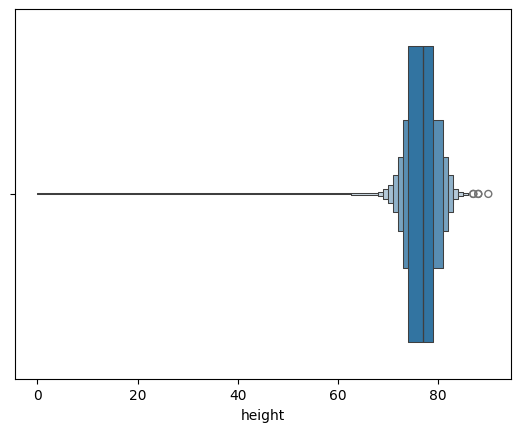

In [487]:
sns.boxenplot(x='height',data=fallplayerdata)

<Axes: xlabel='fga', ylabel='Count'>

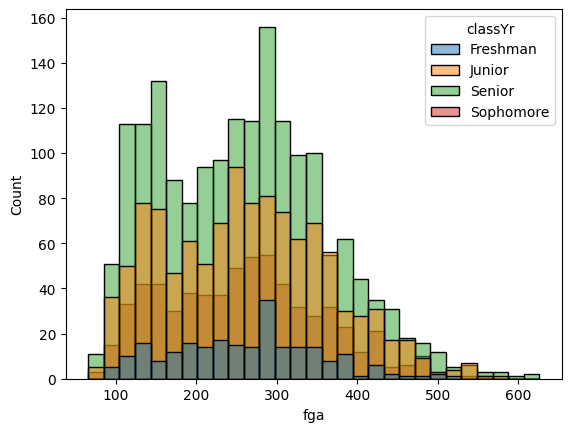

In [490]:
sns.histplot(x='fga',data=fallplayerdata,hue='classYr')

<Axes: xlabel='ws', ylabel='win%'>

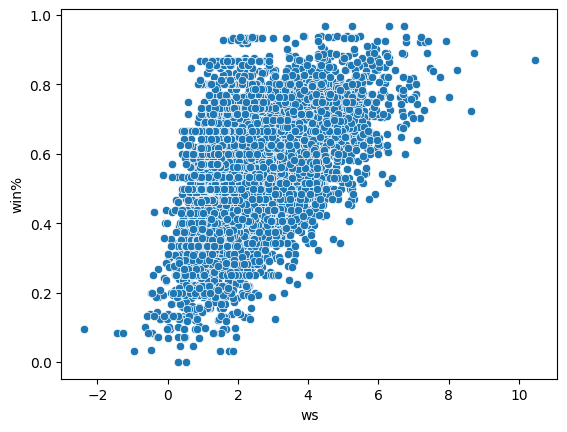

In [491]:
sns.scatterplot(x='ws',y='win%',data=fallplayerdata)

<Axes: xlabel='sos', ylabel='win%'>

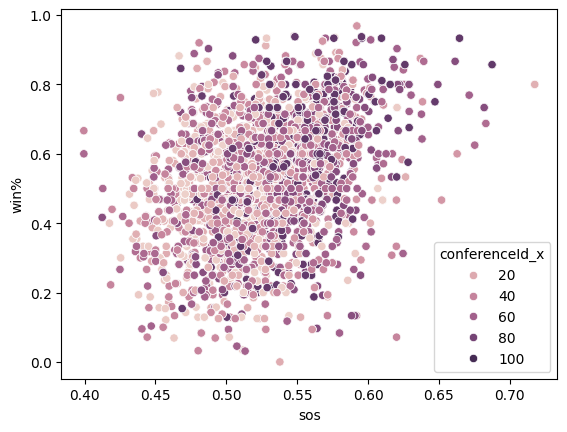

In [511]:
sns.scatterplot(x='sos',y='win%',data=fallplayerdata,hue='conferenceId_x')

In [498]:
fallplayerdata[fallplayerdata['ptsScoredPg'] == fallplayerdata['ptsScoredPg'].max()][['fullName','ptsScoredPg','year']]

,fullName,ptsScoredPg,year
828,Chris Clemons,30.5,2019


In [499]:
fallplayerdata[fallplayerdata['ws'] == fallplayerdata['ws'].max()][['fullName','ws','year']]

,fullName,ws,year
9394,Zach Edey,10.4461,2024


In [500]:
fallplayerdata[fallplayerdata['per'] == fallplayerdata['per'].max()][['fullName','per','year']]

,fullName,per,year
7278,Zach Edey,41.598,2022


In [509]:
byYear = fallplayerdata.groupby('year')[['fga3','fga2','gp_x']].sum().reset_index()
byYear['3pg'] = byYear['fga3']/byYear['gp_x']
byYear['2pg'] = byYear['fga2']/byYear['gp_x']
byYear

,year,fga3,fga2,gp_x,3pg,2pg
0,2019,125337.0,201117.0,30277.0,4.139677,6.642567
1,2020,108246.0,187219.0,27428.0,3.946551,6.825835
2,2021,75027.0,133798.0,19504.0,3.846749,6.860029
3,2022,111003.0,192164.0,28280.0,3.925141,6.795050
4,2024,123781.0,217784.0,31894.0,3.881012,6.828369
5,2025,44064.0,73797.0,11221.0,3.926923,6.576687


<Axes: xlabel='classYr', ylabel='mins'>

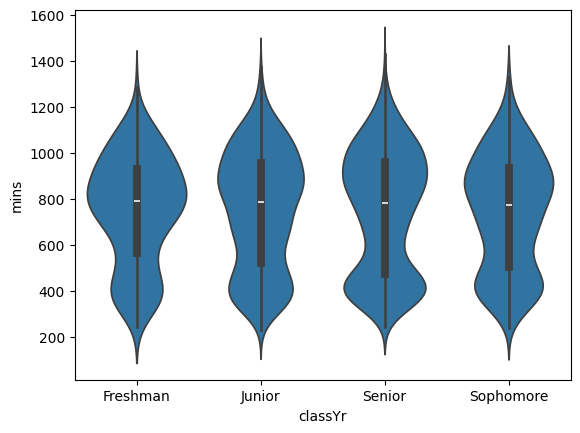

In [517]:
sns.violinplot(x='classYr',y='mins',data=fallplayerdata)

<Axes: xlabel='ptsScored'>

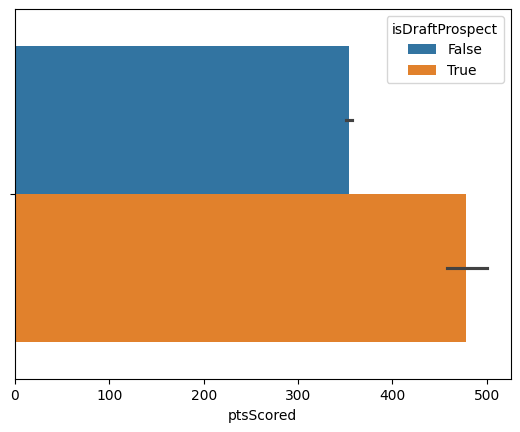

In [536]:
sns.barplot(x='ptsScored',data=fallplayerdata,hue='isDraftProspect')

<Axes: xlabel='mins'>

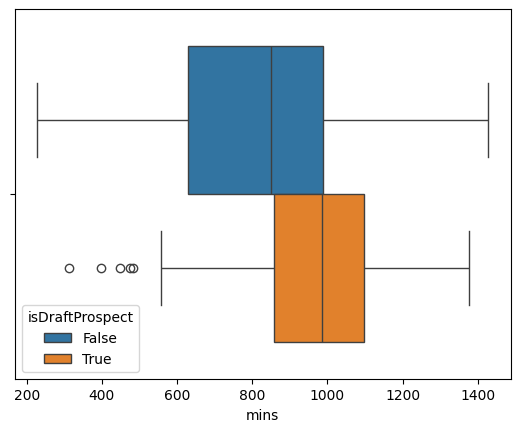

In [539]:
sns.boxplot(x='mins',data=fallplayerdata,hue='isDraftProspect')

/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_16670/1264905622.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='award_prob', y='fullName', data=top_2025, palette='Blues_d')


Text(0.5, 1.0, '2025 Naismith Award Probabilities')

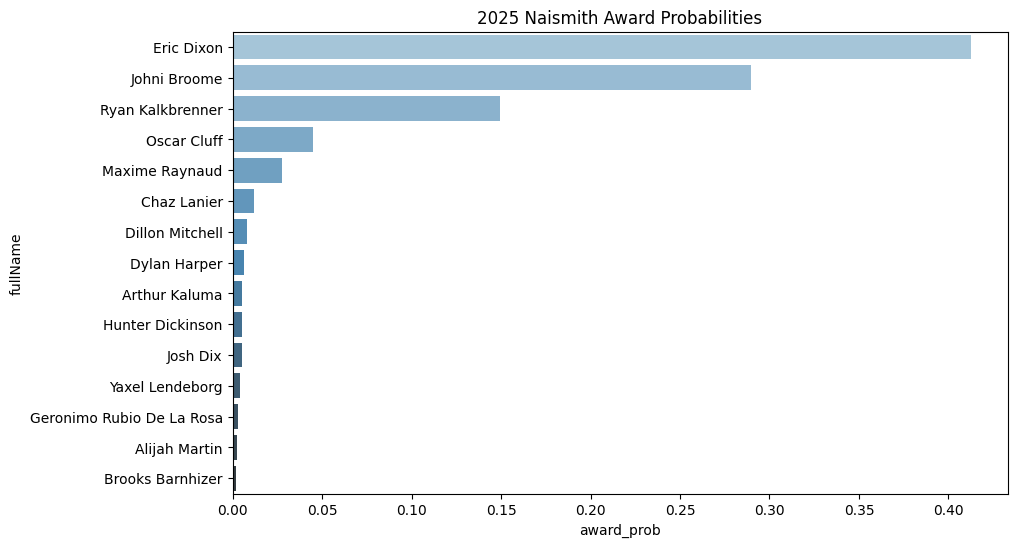

In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# allplayerdata = allplayerdata[allplayerdata['minsPg'] >= 15]
# allplayerdata = allplayerdata[allplayerdata['gs'] >= 10]
# allplayerdata = allplayerdata[allplayerdata['ptsScoredPg'] >= 10]


features = fallplayerdata.drop(columns=['naismith', '_id_x', 'competitionId_x', 'teamId', 'playerId', 'scope_x', 'tournamentId_x', 
                                       'fullName', 'jerseyNum', 'height', 'position', 'classYr', 'isDraftProspect', 'hasImage', 
                                       'teamMarket_x', 'teamName', 'conferenceId_x', 'divisionId_x', 'isLatest', 'nextTeamId', 
                                       'nextCompetitionId', 'priorConferenceId', 'priorCompetitionId', 'isTransfer', 'willTransfer', 
                                       'inPortal', 'updated', 'minsThreshold', 'isQualified', "minsP40", "ptsScoredP40", "fgaP40", "fga2P40", "fga3P40",
     "ftaP40", "astP40", "orbP40", "drbP40", "rebP40", '_id_y', 'competitionId_y', 'scope_y', 'tournamentId_y', 'teamMarket_y', 'conferenceId_y', 'divisionId_y',
     "stlP40", "blkP40", "pfdP40", "tfP40", "scpP40", 
     "pitpP40", "fbptsP40", "blkdP40", "tovP40", "pfP40",
     "opfP40", "dpfP40", "warpP40", "wsP40", "owsP40", "dwsP40",'overallWins', 'overallLosses',
       'confWins', 'confLosses', 'gpPbp', 'overallWinsPbp', 'overallLossesPbp',
       'confWinsPbp', 'confLossesPbp', 'avgBiggestLead',
       'avgBiggestLeadInWins', 'avgBiggestLeadInLosses', 'avgPtsDiff',
       'avgPtsDiffInWins', 'avgPtsDiffInLosses', 'year','prediction', 'award_prob',
       'gp_y','priorTeamId']).columns
X = fallplayerdata[features].fillna(0)
y = fallplayerdata['naismith']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_scaled, y)

# Predictions and Output
fallplayerdata['prediction'] = log_reg.predict_proba(X_scaled)[:, 1]
fallplayerdata['award_prob'] = fallplayerdata.groupby('year')['prediction'].transform(lambda x: x / x.sum())

# Save top players by year
for year in fallplayerdata['year'].unique():
    top_players = fallplayerdata[fallplayerdata['year'] == year].sort_values('award_prob', ascending=False).head(15)
    top_players.to_csv(f"naismith_top_{year}.csv", index=False)

# Visualization for 2025
top_2025 = fallplayerdata[fallplayerdata['year'] == 2025].sort_values('award_prob', ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x='award_prob', y='fullName', data=top_2025, palette='Blues_d')
plt.title('2025 Naismith Award Probabilities')

/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_16670/936023565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='award_prob', y='fullName', data=top_2024, palette='Blues_d')


Text(0.5, 1.0, '2024 Naismith Award Probabilities')

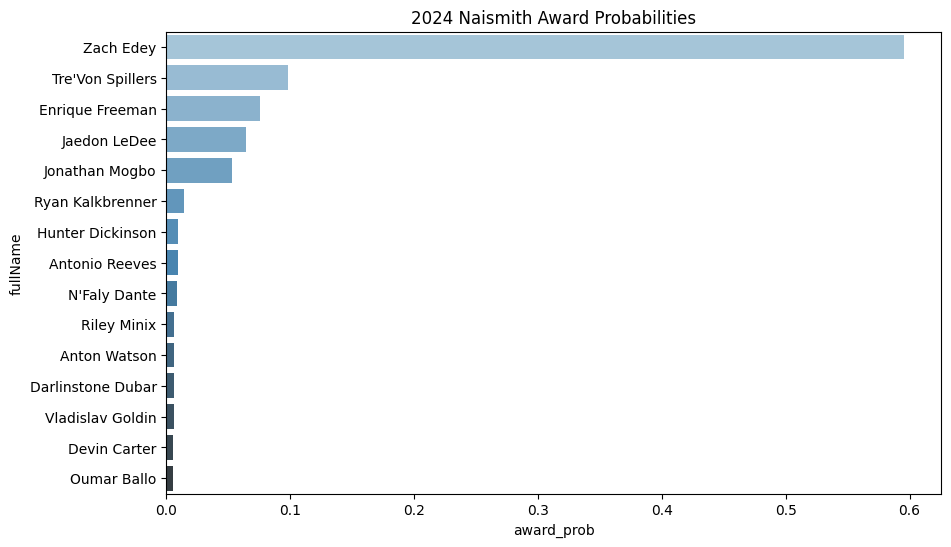

In [476]:
top_2024 = fallplayerdata[fallplayerdata['year'] == 2024].sort_values('award_prob', ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x='award_prob', y='fullName', data=top_2024, palette='Blues_d')
plt.title('2024 Naismith Award Probabilities')

/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_16670/1081067496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='award_prob', y='fullName', data=top_2022, palette='Blues_d')


Text(0.5, 1.0, '2022 Naismith Award Probabilities')

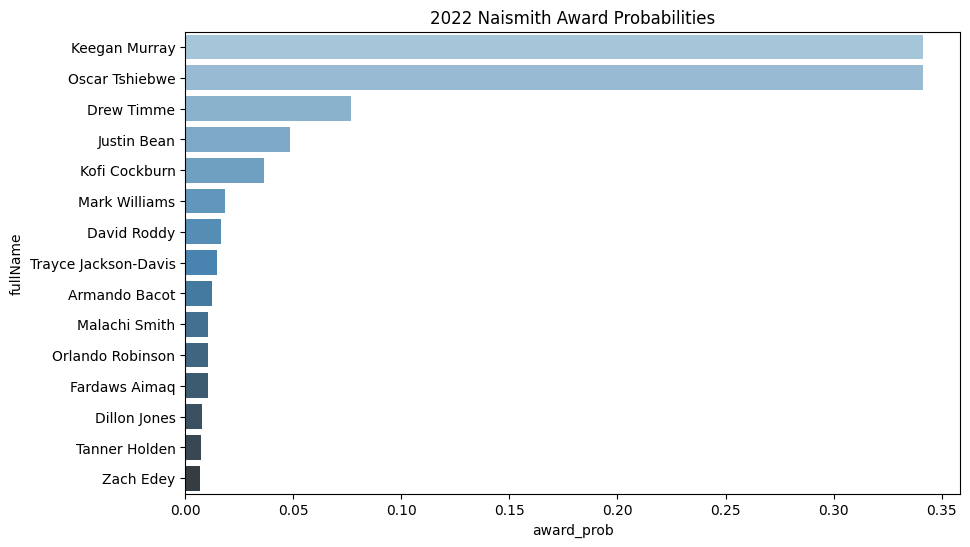

In [477]:
top_2022 = fallplayerdata[fallplayerdata['year'] == 2022].sort_values('award_prob', ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x='award_prob', y='fullName', data=top_2022, palette='Blues_d')
plt.title('2022 Naismith Award Probabilities')

/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_16670/3228051514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='award_prob', y='fullName', data=top_2021, palette='Blues_d')


Text(0.5, 1.0, '2021 Naismith Award Probabilities')

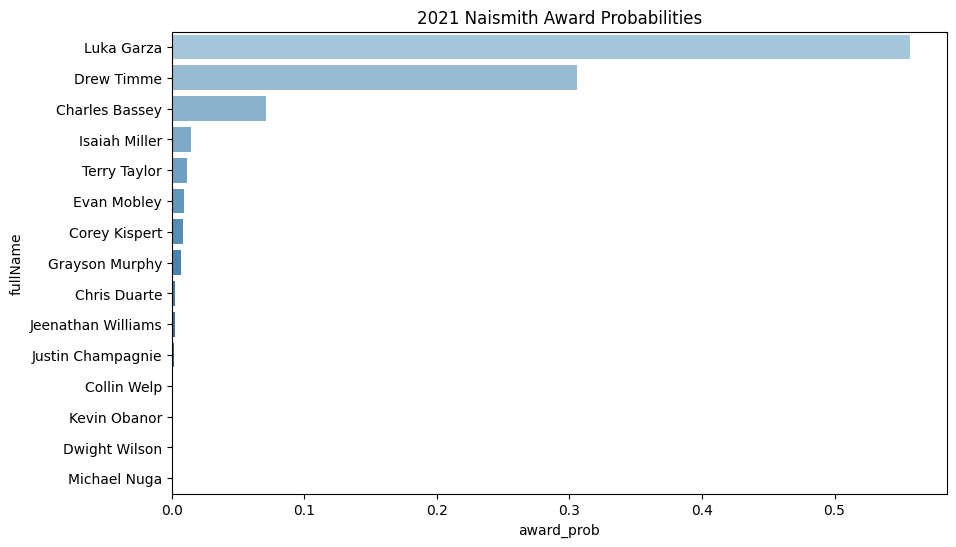

In [478]:
top_2021 = fallplayerdata[fallplayerdata['year'] == 2021].sort_values('award_prob', ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x='award_prob', y='fullName', data=top_2021, palette='Blues_d')
plt.title('2021 Naismith Award Probabilities')

/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_16670/1378590983.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='award_prob', y='fullName', data=top_2020, palette='Blues_d')


Text(0.5, 1.0, '2020 Naismith Award Probabilities')

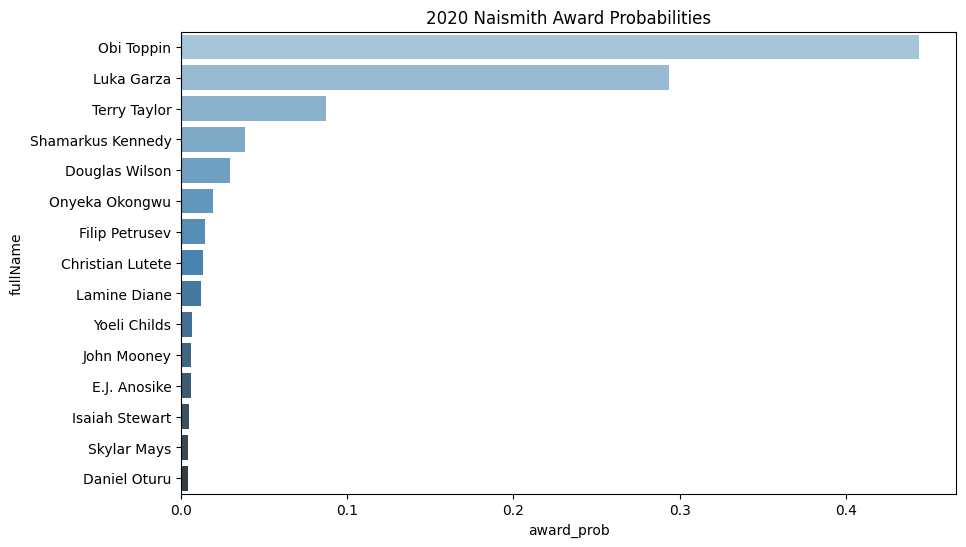

In [479]:
top_2020 = fallplayerdata[fallplayerdata['year'] == 2020].sort_values('award_prob', ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x='award_prob', y='fullName', data=top_2020, palette='Blues_d')
plt.title('2020 Naismith Award Probabilities')

/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_16670/1541139696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='award_prob', y='fullName', data=top_2019, palette='Blues_d')


Text(0.5, 1.0, '2019 Naismith Award Probabilities')

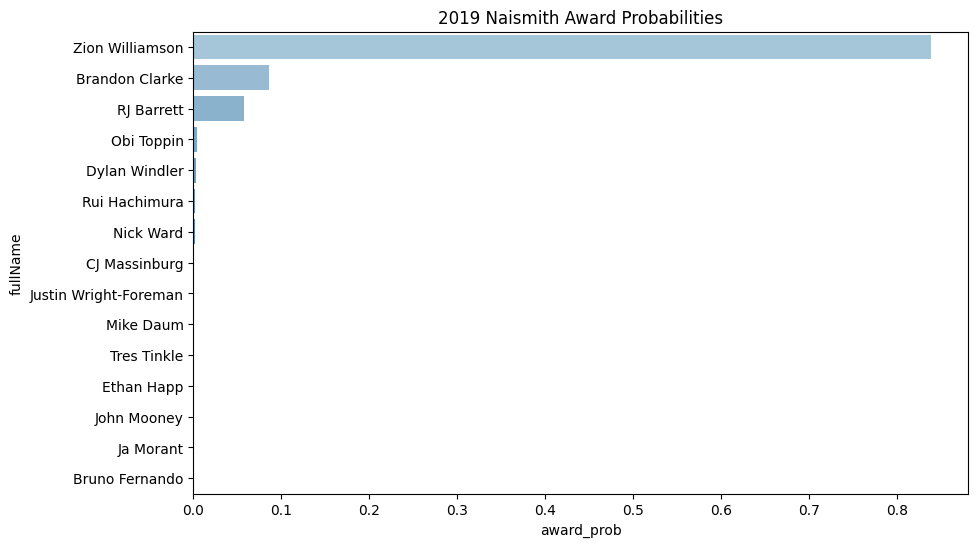

In [480]:
top_2019 = fallplayerdata[fallplayerdata['year'] == 2019].sort_values('award_prob', ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x='award_prob', y='fullName', data=top_2019, palette='Blues_d')
plt.title('2019 Naismith Award Probabilities')